<a href="https://colab.research.google.com/github/christos8566/freecodecamp_data_analysis.res/blob/main/pandas_lessons/3%23pandas_DataFrame_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PANDAS DATAFRAMES**
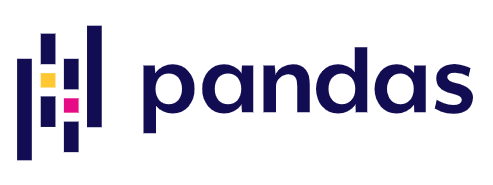


Probably the most important data structure of pandas is the DataFrame. It's a tabular structure tightly integrated with Series.


# A. IMPORT LIBRARIES

In [1]:
import pandas as pd
print('pandas', pd.__version__)

import numpy as np
print('numpy', np.__version__)

pandas 1.5.3
numpy 1.25.2


We'll keep our analysis of G7 countries and looking now at DataFrames. As said, a DataFrame looks a lot like a table (as the one you can appreciate here):

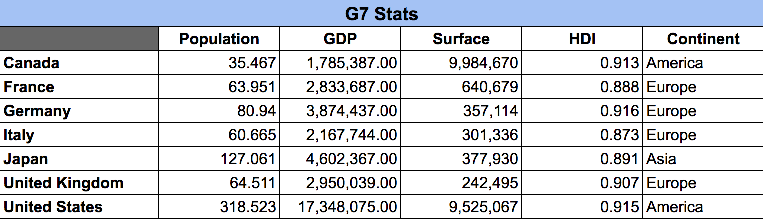



# B. Create DataFrame

Creating DataFrames manually can be tedious. 99% of the time you'll be pulling the data from a Database, a csv file or the web. But still, you can create a DataFrame by specifying the columns and values:



In [2]:
df = pd.DataFrame({
    'Population' : [35.467, 63.951, 80.94, 60.665, 127.061, 64.511, 318.523],
    'GDP' : [1_785_387, 2_833_687, 3_874_437, 2_167_744, 4_602_367, 2_950_039, 17_348_075],
    'Surface' : [9_984_670, 640_679, 357_114, 301_336, 377_930, 242_495, 9_525_067],
    'HDI' : [0.913, 0.888, 0.916, 0.873, 0.891, 0.907, 0.915],
    'Continent' : ['America', 'Europe', 'Europe', 'Europe', 'Asia', 'Europe', 'America']
},
                  columns = ['Population', 'GDP', 'Surface', 'HDI', 'Continent'])

(The columns attribute is optional. I'm using it to keep the same order as in the picture above)

In [3]:
df

,Population,GDP,Surface,HDI,Continent
0,35.467,1785387,9984670,0.913,America
1,63.951,2833687,640679,0.888,Europe
2,80.940,3874437,357114,0.916,Europe
3,60.665,2167744,301336,0.873,Europe
4,127.061,4602367,377930,0.891,Asia
5,64.511,2950039,242495,0.907,Europe
6,318.523,17348075,9525067,0.915,America


DataFrames also have indexes. As you can see in the "table" above, pandas has assigned a numeric, autoincremental index automatically to each "row" in our DataFrame. In our case, we know that each row represents a country, so we'll just reassign the index:

In [4]:
df.index = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United State']
df

,Population,GDP,Surface,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United State,318.523,17348075,9525067,0.915,America


In [5]:
df['GDP'] = df['GDP'].astype(np.float64)
df


,Population,GDP,Surface,HDI,Continent
Canada,35.467,1785387.0,9984670,0.913,America
France,63.951,2833687.0,640679,0.888,Europe
Germany,80.940,3874437.0,357114,0.916,Europe
Italy,60.665,2167744.0,301336,0.873,Europe
Japan,127.061,4602367.0,377930,0.891,Asia
United Kingdom,64.511,2950039.0,242495,0.907,Europe
United State,318.523,17348075.0,9525067,0.915,America


# C. A fitst snapshot of the data

## C1. Return the column names

In [7]:
df.columns

Index(['Population', 'GDP', 'Surface', 'HDI', 'Continent'], dtype='object')

## C2. Return the shape of the DataFrame

In [8]:
df.shape

(7, 5)

## C3. Return the index names

In [9]:
df.index

Index(['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United State'],
      dtype='object')

## C4. Return the ***info*** of the DataFrame

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Canada to United State
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  7 non-null      float64
 1   GDP         7 non-null      float64
 2   Surface     7 non-null      int64  
 3   HDI         7 non-null      float64
 4   Continent   7 non-null      object 
dtypes: float64(3), int64(1), object(1)
memory usage: 636.0+ bytes


## C5. Return the ***size*** of the DataFrame

In [13]:
df.size

35

## C6. Return the ***describe*** of the DataFrame

In [14]:
df.describe()

,Population,GDP,Surface,HDI
count,7.000000,7.000000e+00,7.000000e+00,7.000000
mean,107.302571,5.080248e+06,3.061327e+06,0.900429
std,97.249970,5.494020e+06,4.576187e+06,0.016592
min,35.467000,1.785387e+06,2.424950e+05,0.873000
25%,62.308000,2.500716e+06,3.292250e+05,0.889500
50%,64.511000,2.950039e+06,3.779300e+05,0.907000
75%,104.000500,4.238402e+06,5.082873e+06,0.914000
max,318.523000,1.734808e+07,9.984670e+06,0.916000


## C7. Return the ***dtypes*** of the DataFrame

In [16]:
df.dtypes

Population    float64
GDP           float64
Surface         int64
HDI           float64
Continent      object
dtype: object

## C8. Return the ***value_counts*** of the DataFrame

In [17]:
df.value_counts()

Population  GDP         Surface  HDI    Continent
35.467      1785387.0   9984670  0.913  America      1
60.665      2167744.0   301336   0.873  Europe       1
63.951      2833687.0   640679   0.888  Europe       1
64.511      2950039.0   242495   0.907  Europe       1
80.940      3874437.0   357114   0.916  Europe       1
127.061     4602367.0   377930   0.891  Asia         1
318.523     17348075.0  9525067  0.915  America      1
dtype: int64

# D. Indexing, Selection and Slicing


## D1. Selection by index

Individual columns in the DataFrame can be selected with regular indexing. Each column is represented as a Series:



In [18]:
df

,Population,GDP,Surface,HDI,Continent
Canada,35.467,1785387.0,9984670,0.913,America
France,63.951,2833687.0,640679,0.888,Europe
Germany,80.940,3874437.0,357114,0.916,Europe
Italy,60.665,2167744.0,301336,0.873,Europe
Japan,127.061,4602367.0,377930,0.891,Asia
United Kingdom,64.511,2950039.0,242495,0.907,Europe
United State,318.523,17348075.0,9525067,0.915,America


In [23]:
df.loc['Canada']                    # select the Canada elements with the loc

Population       35.467
GDP           1785387.0
Surface         9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [25]:
df.iloc[-1]                         # select the United Stated elemants with the iloc

Population       318.523
GDP           17348075.0
Surface          9525067
HDI                0.915
Continent        America
Name: United State, dtype: object

## D2. Selection by column

In [29]:
#df.Population
df['Population']

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United State      318.523
Name: Population, dtype: float64

Note that the ***index*** of the returned Series is the same as the DataFrame one. And its name is the name of the column. If you're working on a notebook and want to see a more DataFrame-like format you **can** use the to_frame method:



In [31]:
df['Population'].to_frame()

,Population
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United State,318.523


Multiple columns can also be selected similarly to numpy and Series:



In [32]:
df[['Population', 'GDP']]

,Population,GDP
Canada,35.467,1785387.0
France,63.951,2833687.0
Germany,80.940,3874437.0
Italy,60.665,2167744.0
Japan,127.061,4602367.0
United Kingdom,64.511,2950039.0
United State,318.523,17348075.0


## D3. Slicing

In this case, the result is another DataFrame. Slicing works differently, it acts at "row level", and can be counter intuitive:



In [53]:
df[1:3]

,Population,GDP,Surface,HDI,Continent
France,63.951,2833687.0,640679,0.888,Europe
Germany,80.940,3874437.0,357114,0.916,Europe


Row level selection works better with `loc` and `iloc` **which are recommended** over regular "direct slicing" `(df[:])`.

`loc` selects rows matching the given index:

In [54]:
df.loc['Italy']

Population       60.665
GDP           2167744.0
Surface          301336
HDI               0.873
Continent        Europe
Name: Italy, dtype: object

In [55]:
df.loc['France' : 'Italy']                      # in this case the last column inclunded

,Population,GDP,Surface,HDI,Continent
France,63.951,2833687.0,640679,0.888,Europe
Germany,80.940,3874437.0,357114,0.916,Europe
Italy,60.665,2167744.0,301336,0.873,Europe


As a second "argument", you can pass the column(s) you'd like to select:



In [62]:
df.loc['France' : 'Italy', 'Population' : 'Surface']

,Population,GDP,Surface
France,63.951,2833687.0,640679
Germany,80.940,3874437.0,357114
Italy,60.665,2167744.0,301336


In [63]:
df.loc['France' : 'Italy', ['Population', 'Continent']]

,Population,Continent
France,63.951,Europe
Germany,80.940,Europe
Italy,60.665,Europe


## D4. Slicing with iloc

`iloc` works with the (numeric) "position" of the index:



In [64]:
df

,Population,GDP,Surface,HDI,Continent
Canada,35.467,1785387.0,9984670,0.913,America
France,63.951,2833687.0,640679,0.888,Europe
Germany,80.940,3874437.0,357114,0.916,Europe
Italy,60.665,2167744.0,301336,0.873,Europe
Japan,127.061,4602367.0,377930,0.891,Asia
United Kingdom,64.511,2950039.0,242495,0.907,Europe
United State,318.523,17348075.0,9525067,0.915,America


In [66]:
df.iloc[0]#.to_frame()

Population       35.467
GDP           1785387.0
Surface         9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [70]:
df.iloc[-1]#.to_frame()

Population       318.523
GDP           17348075.0
Surface          9525067
HDI                0.915
Continent        America
Name: United State, dtype: object

In [71]:
df.iloc[[0, 1, -1]]

,Population,GDP,Surface,HDI,Continent
Canada,35.467,1785387.0,9984670,0.913,America
France,63.951,2833687.0,640679,0.888,Europe
United State,318.523,17348075.0,9525067,0.915,America


In [72]:
df.iloc[1:3]

,Population,GDP,Surface,HDI,Continent
France,63.951,2833687.0,640679,0.888,Europe
Germany,80.940,3874437.0,357114,0.916,Europe


In [78]:
df.iloc[1:3, 3]#.to_frame()

France     0.888
Germany    0.916
Name: HDI, dtype: float64

In [82]:
df.iloc[1:3, :3]

,Population,GDP,Surface
France,63.951,2833687.0,640679
Germany,80.940,3874437.0,357114


In [79]:
df.iloc[1:3, 1:3]

,GDP,Surface
France,2833687.0,640679
Germany,3874437.0,357114
